# Lab 5: Drzewa Decyzyjne

### Przygotowanie danych

In [194]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
#print(data_breast_cancer['DESCR'])

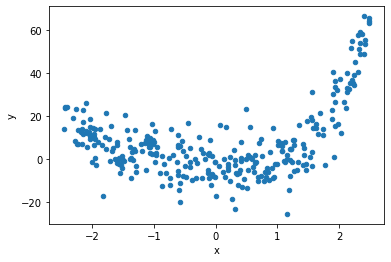

In [195]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

### Klasyfikacja

In [196]:
from sklearn.tree import DecisionTreeClassifier

X_cancer = data_breast_cancer.data[["mean texture", "mean symmetry"]].copy()
y_cancer = data_breast_cancer.target

In [197]:
from sklearn.model_selection import train_test_split
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer,
                                                                                test_size=0.20, random_state=42)

* Rozne glebokosci drzewa:

In [198]:
tree_clf_d1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf_d2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_d3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_d4 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf_d5 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf_d6 = DecisionTreeClassifier(max_depth=6, random_state=42)

In [199]:
tree_clf_d1.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [200]:
tree_clf_d2.fit(X_train_cancer, y_train_cancer) 

DecisionTreeClassifier(max_depth=2, random_state=42)

In [201]:
tree_clf_d3.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [202]:
tree_clf_d4.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [203]:
tree_clf_d5.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [204]:
tree_clf_d6.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier(max_depth=6, random_state=42)

* Generowanie drzewa decyzyjnego:

In [205]:
from sklearn.tree import export_graphviz

"""
tree_clf = [tree_clf_d1, tree_clf_d2, tree_clf_d3]
file = ["cancer_tree_train1.dot", "cancer_tree_train2.dot", "cancer_tree_train3.dot"]
"""

'\ntree_clf = [tree_clf_d1, tree_clf_d2, tree_clf_d3]\nfile = ["cancer_tree_train1.dot", "cancer_tree_train2.dot", "cancer_tree_train3.dot"]\n'

In [206]:
"""
for index in range(len(tree_clf)):
    export_graphviz(
        tree_clf[index],
        out_file=file[index],
        feature_names=data_breast_cancer.feature_names[[1,8]],
        class_names=[str(num)+", "+name
                     for num,name in
                     zip(set(y_cancer),
                         data_breast_cancer.target_names)],
        rounded=True,
        filled=True
    ) 
    print(file[index])
"""

'\nfor index in range(len(tree_clf)):\n    export_graphviz(\n        tree_clf[index],\n        out_file=file[index],\n        feature_names=data_breast_cancer.feature_names[[1,8]],\n        class_names=[str(num)+", "+name\n                     for num,name in\n                     zip(set(y_cancer),\n                         data_breast_cancer.target_names)],\n        rounded=True,\n        filled=True\n    ) \n    print(file[index])\n'

In [207]:
import graphviz
from sklearn.metrics import f1_score

### Drzewa decyzyjne i wartosci f1

glebokosc = 1

In [208]:
print(f1_score(y_train_cancer, tree_clf_d1.predict(X_train_cancer)))
print(f1_score(y_test_cancer, tree_clf_d1.predict(X_test_cancer)))

0.7539062500000001
0.6949152542372881


glebokosc = 2

In [209]:
f1_score_train = f1_score(y_train_cancer, tree_clf_d2.predict(X_train_cancer))
print(f1_score_train)
f1_score_test = f1_score(y_test_cancer, tree_clf_d2.predict(X_test_cancer))
print(f1_score_test)

0.8211243611584327
0.7887323943661971


glebokosc = 3

In [210]:
print(f1_score(y_train_cancer, tree_clf_d3.predict(X_train_cancer)))
print(f1_score(y_test_cancer, tree_clf_d3.predict(X_test_cancer)))

0.8211243611584327
0.7887323943661971


glebokosc = 4

In [211]:
print(f1_score(y_train_cancer, tree_clf_d4.predict(X_train_cancer)))
print(f1_score(y_test_cancer, tree_clf_d4.predict(X_test_cancer)))

0.8464163822525598
0.7647058823529411


glebokosc = 5

In [212]:
print(f1_score(y_train_cancer, tree_clf_d5.predict(X_train_cancer)))
print(f1_score(y_test_cancer, tree_clf_d5.predict(X_test_cancer)))

0.8710217755443886
0.7397260273972602


glebokosc = 6

In [213]:
print(f1_score(y_train_cancer, tree_clf_d6.predict(X_train_cancer)))
print(f1_score(y_test_cancer, tree_clf_d6.predict(X_test_cancer)))

0.8965517241379309
0.7310344827586208


In [214]:
# zapiswyanie obrazka dla rzędu 2, bo powyżej overfitting:

export_graphviz(
        tree_clf_d2,
        out_file="bc",
        feature_names=data_breast_cancer.feature_names[[1,8]],
        class_names=[str(num)+", "+name
                     for num,name in
                     zip(set(y_cancer),
                         data_breast_cancer.target_names)],
        rounded=True,
        filled=True
    ) 

graphviz.render('dot', 'png', "bc")

'bc.png'

obliczenie accuracy dla 2 rzedu

In [215]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train_cancer, tree_clf_d2.predict(X_train_cancer))
acc_test = accuracy_score(y_test_cancer, tree_clf_d2.predict(X_test_cancer))

zapisanie pliku pickle:

In [216]:
import pickle

f1acc_tree = [2.0, f1_score_train, f1_score_test, acc_train, acc_test]
print(f1acc_tree)
with open('f1acc_tree.pkl','wb') as f: pickle.dump(f1acc_tree, f)

[2.0, 0.8211243611584327, 0.7887323943661971, 0.7692307692307693, 0.7368421052631579]


# Regresja

Podział na zbiór uczący i testujący

In [217]:
X_df = df[["x"]].copy()
y_df = df[["y"]].copy()

In [218]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.20, random_state=42)

regresor i MSE

In [219]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error #MSE

In [220]:
for i in range(10):
  tree_reg = DecisionTreeRegressor(max_depth=i+1)
  tree_reg.fit(X_train_df, y_train_df)

  mse_train = mean_squared_error(y_train_df, tree_reg.predict(X_train_df[["x"]]))
  mse_test = mean_squared_error(y_test_df, tree_reg.predict(X_test_df[["x"]]))

  print(mse_train, mse_test, "d=", i+1)

111.76189188646065 104.71603450663379 d= 1
75.7709914570045 79.4200480137039 d= 2
59.096647727215924 81.11647149192409 d= 3
49.85794527108566 83.7324778788598 d= 4
41.725305835240306 86.97584179997533 d= 5
37.42026959324587 92.58664200287107 d= 6
32.71476203200167 92.46074379139608 d= 7
24.338981037416648 119.49088546912552 d= 8
17.367989518311106 141.38059776848925 d= 9
9.928880585182318 141.97131064220068 d= 10


najlepszy regresor jest dla d=4 (pozniej overfitting)

In [221]:
tree_reg = DecisionTreeRegressor(max_depth = 4)
tree_reg.fit(X_train_df, y_train_df)

mse_train = mean_squared_error(y_train_df, tree_reg.predict(X_train_df[["x"]]))
mse_test = mean_squared_error(y_test_df, tree_reg.predict(X_test_df[["x"]]))

print(mse_train, mse_test)

49.85794527108566 83.7324778788598


In [222]:
export_graphviz(
        tree_reg,
        out_file="reg",
        rounded=True,
        filled=True
    ) 

graphviz.render('dot', 'png', "reg")

'reg.png'

In [223]:
import pickle

mse_tree = [4.0, mse_train, mse_test]
print(mse_tree)
with open('mse_tree.pkl','wb') as f: pickle.dump(mse_tree, f)

[4.0, 49.85794527108566, 83.7324778788598]
